<a href="https://colab.research.google.com/github/willaure/Finding-Duplicates-Lab/blob/main/Untitled30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup: Install Required Libraries

In [1]:
# Install required Python packages
!pip install pandas matplotlib seaborn --quiet

# Verify installations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Packages successfully installed:")
print(f"- pandas v{pd.__version__}")
print(f"- matplotlib v{plt.matplotlib.__version__}")
print(f"- seaborn v{sns.__version__}")

Packages successfully installed:
- pandas v2.2.2
- matplotlib v3.10.0
- seaborn v0.13.2


In [ ]:
#  Load the Dataset¶
# We use the pandas.read_csv() function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
# The functions below will download the dataset into your browser:

In [2]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
# 2. Explore the Dataset¶
# Task 1: Display basic information and summary statistics of the dataset.

In [3]:
# Task 1: Display basic information and summary statistics
print("🔍 BASIC DATASET INFORMATION")
print("="*50)
# 1. Basic Info
print("\n📝 STRUCTURE OVERVIEW:")
display(df.info(verbose=True, show_counts=True))

# 2. Summary Statistics
print("\n📊 NUMERICAL COLUMNS SUMMARY:")
display(df.describe(include='number').T.style.format("{:.2f}"))

print("\n📋 CATEGORICAL COLUMNS SUMMARY:")
display(df.describe(include='object').T)

# 3. Missing Values Analysis
print("\n❓ MISSING VALUES ANALYSIS:")
missing_data = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage (%)': (df.isna().mean()*100).round(2)
}).sort_values('Missing Values', ascending=False)
display(missing_data[missing_data['Missing Values'] > 0])

# 4. Memory Usage
print("\n💾 MEMORY USAGE (MB):")
print(f"{df.memory_usage(deep=True).sum()/(1024*1024):.2f} MB")

# 5. Unique Value Counts
print("\n✨ UNIQUE VALUES PER COLUMN:")
unique_counts = pd.DataFrame({
    'Unique Values': df.nunique(),
    'Sample Values': [df[col].dropna().unique()[:3] for col in df.columns]
})
display(unique_counts)

🔍 BASIC DATASET INFORMATION

📝 STRUCTURE OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                  

None


📊 NUMERICAL COLUMNS SUMMARY:



📋 CATEGORICAL COLUMNS SUMMARY:


count unique                                   top  \
MainBranch            65437      5        I am a developer by profession   
Age                   65437      8                       25-34 years old   
Employment            65437    110                   Employed, full-time   
RemoteWork            54806      3  Hybrid (some remote, some in-person)   
Check                 65437      1                                Apples   
...                     ...    ...                                   ...   
ProfessionalCloud     28491      3            Hybrid (on-prem and cloud)   
ProfessionalQuestion  28807      9      Traditional public search engine   
Industry              28858     15                  Software Development   
SurveyLength          56182      3                 Appropriate in length   
SurveyEase            56238      3                                  Easy   

                       freq  
MainBranch            50207  
Age                   23911  
Employment            39041  
RemoteWork            23015  
Check                 65437  
...                     ...  
ProfessionalCloud     13230  
ProfessionalQuestion  15813  
Industry              11918  
SurveyLength          38767  
SurveyEase            30071  

[100 rows x 4 columns]


❓ MISSING VALUES ANALYSIS:


Missing Values  Percentage (%)
AINextMuch less integrated           64289           98.25
AINextLess integrated                63082           96.40
AINextNo change                      52939           80.90
AINextMuch more integrated           51999           79.46
EmbeddedAdmired                      48704           74.43
...                                    ...             ...
YearsCode                             5568            8.51
NEWSOSites                            5151            7.87
LearnCode                             4949            7.56
EdLevel                               4653            7.11
AISelect                              4530            6.92

[109 rows x 2 columns]


💾 MEMORY USAGE (MB):
450.73 MB

✨ UNIQUE VALUES PER COLUMN:


Unique Values  \
ResponseId                   65437   
MainBranch                       5   
Age                              8   
Employment                     110   
RemoteWork                       3   
...                            ...   
JobSatPoints_11                 79   
SurveyLength                     3   
SurveyEase                       3   
ConvertedCompYearly           6113   
JobSat                          11   

                                                         Sample Values  
ResponseId                                                   [1, 2, 3]  
MainBranch           [I am a developer by profession, I am learning...  
Age                  [Under 18 years old, 35-44 years old, 45-54 ye...  
Employment           [Employed, full-time, Student, full-time, Stud...  
RemoteWork           [Remote, In-person, Hybrid (some remote, some ...  
...                                                                ...  
JobSatPoints_11                                     [0.0, 10.0, 100.0]  
SurveyLength              [Appropriate in length, Too long, Too short]  
SurveyEase               [Easy, Neither easy nor difficult, Difficult]  
ConvertedCompYearly                         [7322.0, 30074.0, 91295.0]  
JobSat                                                [8.0, 5.0, 10.0]  

[114 rows x 2 columns]

In [ ]:
# 3. Finding Missing Values¶
# Task 2: Identify missing values for all columns.

🔍 MISSING VALUES ANALYSIS

📊 MISSING VALUES SUMMARY:


Missing Values  Percentage (%) Data Type
AINextMuch less integrated           64289           98.25    object
AINextLess integrated                63082           96.40    object
AINextNo change                      52939           80.90    object
AINextMuch more integrated           51999           79.46    object
EmbeddedAdmired                      48704           74.43    object
...                                    ...             ...       ...
YearsCode                             5568            8.51    object
NEWSOSites                            5151            7.87    object
LearnCode                             4949            7.56    object
EdLevel                               4653            7.11    object
AISelect                              4530            6.92    object

[109 rows x 3 columns]

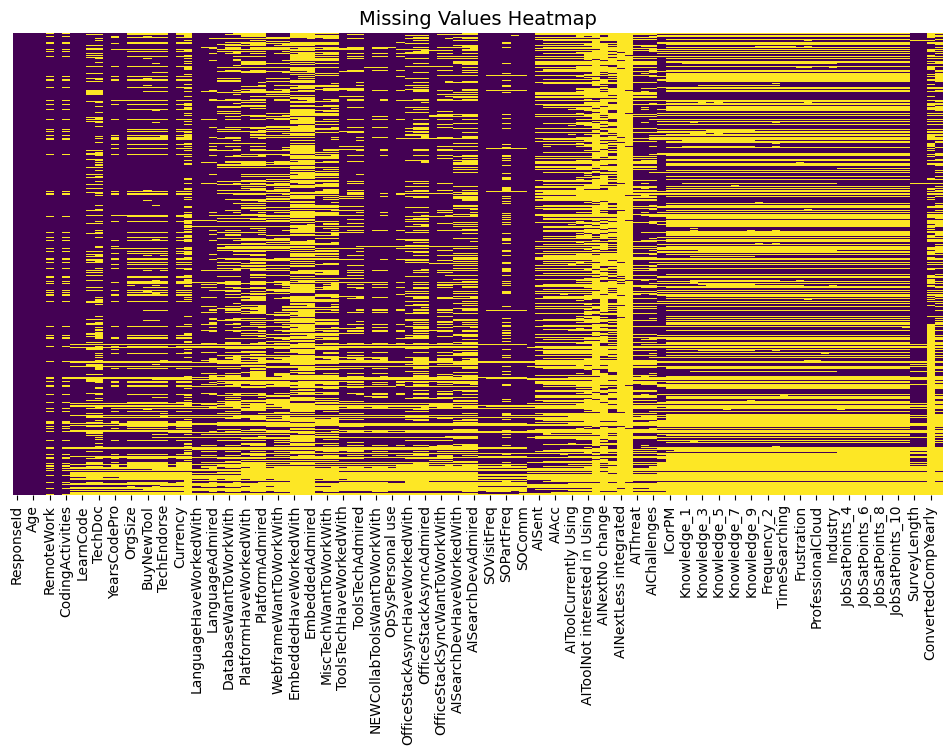


🧐 DETAILED COLUMN ANALYSIS:

Column: AINextMuch less integrated (object) - 64289 missing (98.25%)
Top categories: {nan: 64289, 'Writing code': 154, 'Learning about a codebase': 88}

Column: AINextLess integrated (object) - 63082 missing (96.4%)
Top categories: {nan: 63082, 'Writing code': 490, 'Search for answers': 213}

Column: AINextNo change (object) - 52939 missing (80.9%)
Top categories: {nan: 52939, 'Writing code': 1852, 'Search for answers': 1096}

Column: AINextMuch more integrated (object) - 51999 missing (79.46%)
Top categories: {nan: 51999, 'Search for answers': 1426, 'Writing code': 874}

Column: EmbeddedAdmired (object) - 48704 missing (74.43%)
Top categories: {nan: 48704, 'Rasberry Pi': 3446, 'Arduino;Rasberry Pi': 1402}

Column: EmbeddedWantToWorkWith (object) - 47837 missing (73.1%)
Top categories: {nan: 47837, 'Rasberry Pi': 3036, 'Arduino;Rasberry Pi': 2093}

Column: EmbeddedHaveWorkedWith (object) - 43223 missing (66.05%)
Top categories: {nan: 43223, 'Rasberry Pi': 


Column: AIToolNot interested in Using (object) - 41023 missing (62.69%)
Top categories: {nan: 41023, 'Project planning': 1734, 'Project planning;Committing and reviewing code;Deployment and monitoring;Predictive analytics': 683}

Column: AINextMore integrated (object) - 41009 missing (62.67%)
Top categories: {nan: 41009, 'Writing code': 2608, 'Search for answers': 1299}

Column: Knowledge_9 (object) - 37802 missing (57.77%)
Top categories: {nan: 37802, 'Agree': 6657, 'Strongly disagree': 6379}

Column: Frequency_3 (object) - 37727 missing (57.65%)
Top categories: {nan: 37727, '1-2 times a week': 14426, 'Never': 8206}

Column: Knowledge_8 (object) - 37679 missing (57.58%)
Top categories: {nan: 37679, 'Agree': 10759, 'Neither agree nor disagree': 7046}

Column: ProfessionalTech (object) - 37673 missing (57.57%)
Top categories: {nan: 37673, 'None of these': 2834, 'DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservice


Column: JobSatPoints_1 (float64) - 36113 missing (55.19%)
Statistics:



Column: JobSatPoints_4 (float64) - 36044 missing (55.08%)
Statistics:



Column: JobSatPoints_5 (float64) - 36026 missing (55.05%)
Statistics:



Column: JobSatPoints_11 (float64) - 35992 missing (55.0%)
Statistics:



Column: JobSatPoints_7 (float64) - 35989 missing (55.0%)
Statistics:



Column: JobSatPoints_6 (float64) - 35987 missing (54.99%)
Statistics:



Column: JobSatPoints_10 (float64) - 35987 missing (54.99%)
Statistics:



Column: JobSatPoints_8 (float64) - 35981 missing (54.99%)
Statistics:



Column: JobSatPoints_9 (float64) - 35981 missing (54.99%)
Statistics:



Column: MiscTechAdmired (object) - 35841 missing (54.77%)
Top categories: {nan: 35841, '.NET (5+) ': 3597, 'Spring Framework': 1342}

Column: WorkExp (float64) - 35779 missing (54.68%)
Statistics:



Column: ICorPM (object) - 35636 missing (54.46%)
Top categories: {nan: 35636, 'Individual contributor': 25888, 'People manager': 3913}

Column: AIToolInterested in Using (object) - 34746 missing (53.1%)
Top categories: {nan: 34746, 'Learning about a codebase': 598, 'Documenting code': 561}

Column: PlatformAdmired (object) - 34060 missing (52.05%)
Top categories: {nan: 34060, 'Amazon Web Services (AWS)': 6240, 'Microsoft Azure': 3572}

Column: MiscTechWantToWorkWith (object) - 32473 missing (49.62%)
Top categories: {nan: 32473, '.NET (5+) ': 2379, 'Flutter': 825}

Column: CompTotal (float64) - 31697 missing (48.44%)
Statistics:



Column: PlatformWantToWorkWith (object) - 30905 missing (47.23%)
Top categories: {nan: 30905, 'Amazon Web Services (AWS)': 4859, 'Microsoft Azure': 2782}

Column: WebframeAdmired (object) - 30494 missing (46.6%)
Top categories: {nan: 30494, 'React': 1422, 'Spring Boot': 1272}

Column: AIToolCurrently Using (object) - 30365 missing (46.4%)
Top categories: {nan: 30365, 'Writing code;Debugging and getting help;Search for answers': 2023, 'Writing code': 1957}

Column: AISearchDevAdmired (object) - 29894 missing (45.68%)
Top categories: {nan: 29894, 'ChatGPT': 10092, 'ChatGPT;GitHub Copilot': 4954}

Column: AISearchDevWantToWorkWith (object) - 28736 missing (43.91%)
Top categories: {nan: 28736, 'ChatGPT': 7478, 'ChatGPT;GitHub Copilot': 5276}

Column: AIBen (object) - 28543 missing (43.62%)
Top categories: {nan: 28543, 'Increase productivity;Greater efficiency;Speed up learning': 4391, 'Increase productivity;Greater efficiency': 3901}

Column: AIComplex (object) - 28416 missing (43.42%)
To

In [4]:
# Task 2: Identify and Analyze Missing Values
print("🔍 MISSING VALUES ANALYSIS")
print("="*50)

# 1. Calculate missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# 2. Create missing values summary dataframe
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent,
    'Data Type': df.dtypes
}).sort_values('Missing Values', ascending=False)

# 3. Display columns with missing values
print("\n📊 MISSING VALUES SUMMARY:")
display(missing_df[missing_df['Missing Values'] > 0])

# 4. Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14)
plt.show()

# 5. Detailed column analysis
print("\n🧐 DETAILED COLUMN ANALYSIS:")
for col in missing_df[missing_df['Missing Values'] > 0].index:
    print(f"\nColumn: {col} ({df[col].dtype}) - {missing_df.loc[col, 'Missing Values']} missing ({missing_df.loc[col, 'Percentage (%)']}%)")

    if df[col].dtype == 'object':
        print("Top categories:", df[col].value_counts(dropna=False).head(3).to_dict())
    else:
        print("Statistics:")
        display(df[col].describe().to_frame().T.style.format("{:.2f}"))

print("\n✅ Missing values analysis complete!")

In [ ]:
# Task 3: Visualize missing values using a heatmap (Using seaborn library).

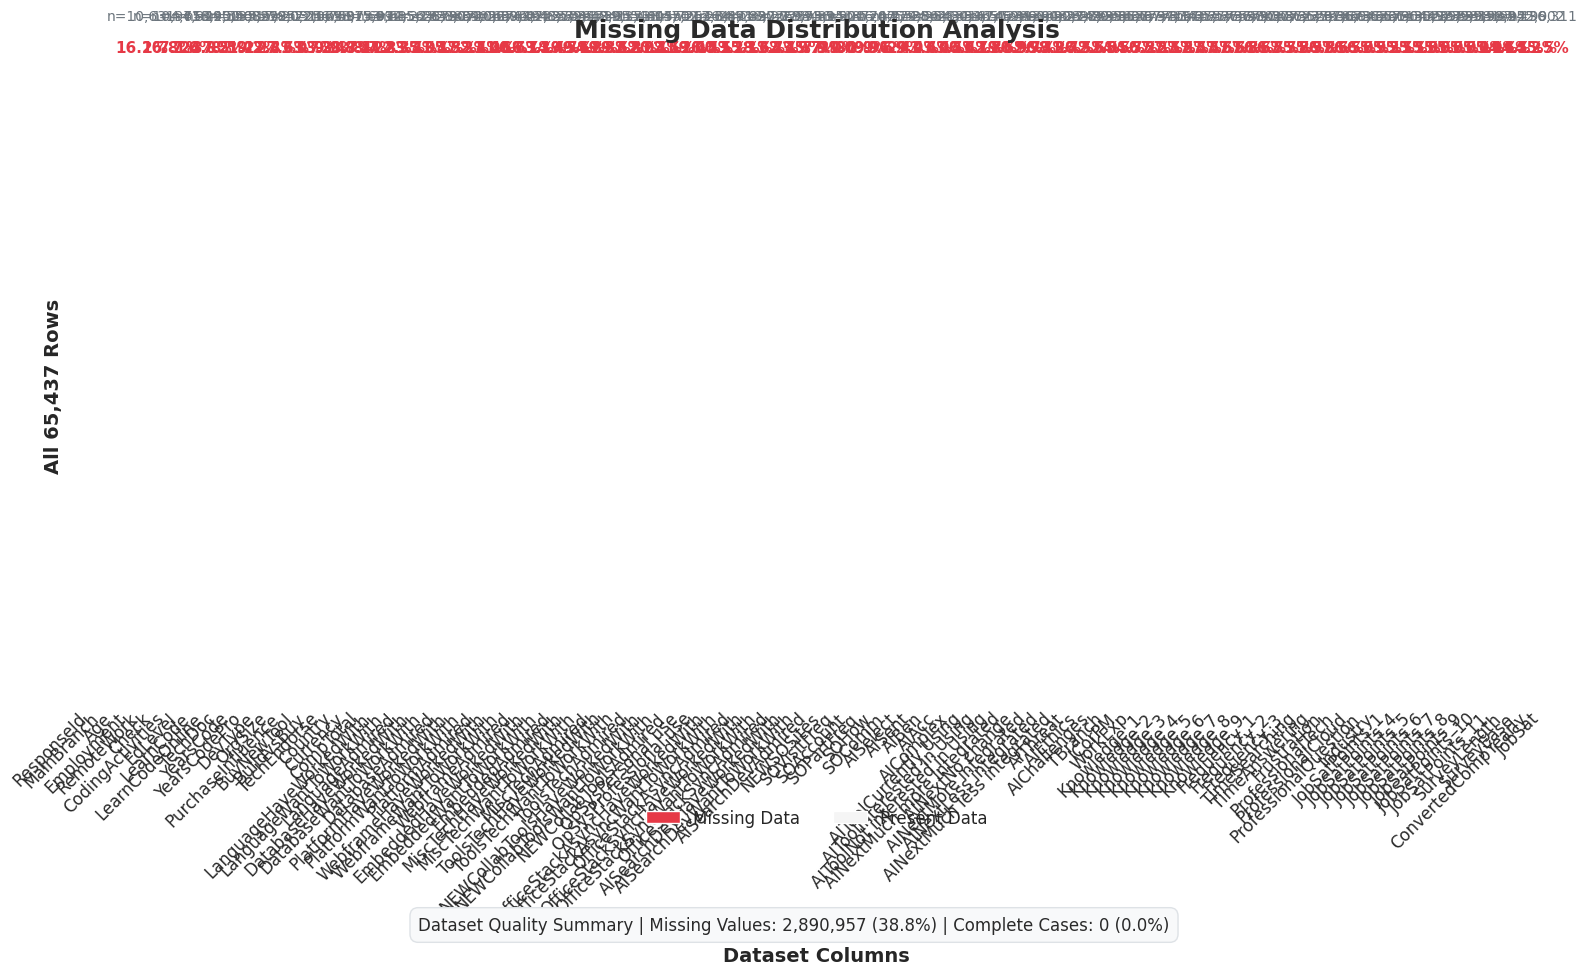

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(16, 10))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Clean font

# Custom color palette
present_color = "#f5f5f5"  # Light grey
missing_color = "#e63946"  # Vibrant red
cmap = sns.color_palette([present_color, missing_color])

# Create heatmap with improved parameters
ax = sns.heatmap(
    df.isnull(),
    cmap=cmap,
    cbar=False,
    yticklabels=False,
    xticklabels=True,
    linewidths=0.5,
    linecolor='white',
    square=False
)

# Enhanced title and labels
plt.title("Missing Data Distribution Analysis",
          fontsize=18, pad=25, weight='bold', color='#2a2a2a')
plt.xlabel("Dataset Columns", fontsize=14, labelpad=15, weight='semibold')
plt.ylabel(f"All {len(df):,} Rows", fontsize=14, labelpad=15, weight='semibold')

# Improved x-axis labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=12,
    fontweight='normal',
    color='#2a2a2a'
)

# Add column-wise missing data annotations
missing_pct = df.isnull().mean()
for i, pct in enumerate(missing_pct):
    if pct > 0:
        ax.text(
            i + 0.5,
            -0.05 * len(df),  # Position above heatmap
            f"{pct:.1%}",
            ha='center',
            va='top',
            fontsize=11,
            fontweight='bold',
            color='#e63946'
        )
        ax.text(
            i + 0.5,
            -0.1 * len(df),
            f"n={df.iloc[:, i].isnull().sum():,}",
            ha='center',
            va='top',
            fontsize=10,
            color='#6c757d'
        )

# Add comprehensive legend
legend_elements = [
    plt.Rectangle((0,0),1,1, fc=missing_color, edgecolor='white', label='Missing Data'),
    plt.Rectangle((0,0),1,1, fc=present_color, edgecolor='white', label='Present Data')
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=12
)

# Add summary statistics
total_missing = df.isnull().sum().sum()
plt.figtext(
    0.5, 0.05,
    f"Dataset Quality Summary | Missing Values: {total_missing:,} ({total_missing/df.size:.1%}) | Complete Cases: {df.dropna().shape[0]:,} ({df.dropna().shape[0]/len(df):.1%})",
    ha='center',
    fontsize=12,
    color='#2a2a2a',
    bbox=dict(facecolor='#f8f9fa', edgecolor='#dee2e6', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()

In [8]:
# Task 4: Count the number of missing rows for a specific column (e.g., Employment).

In [9]:
# Count missing values in a specific column
column_name = 'Employment'  # my target column

if column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    total_rows = len(df)

    print(f"Missing values in '{column_name}':")
    print(f"• Absolute count: {missing_count:,}")
    print(f"• Percentage: {missing_count/total_rows:.1%}")
    print(f"• Data type: {df[column_name].dtype}")

    # Show value counts if column has data
    if missing_count < total_rows:
        print("\nValue distribution:")
        print(df[column_name].value_counts(dropna=False).head())
else:
    print(f"Column '{column_name}' not found in dataset.")
    print("Available columns:", list(df.columns))

Missing values in 'Employment':
• Absolute count: 0
• Percentage: 0.0%
• Data type: object

Value distribution:
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Name: count, dtype: int64


In [10]:
# 4. Imputing Missing Values¶
# Task 5: Identify the most frequent (majority) value in a specific column (e.g., Employment).

In [11]:
# Task 5: Identify and impute the most frequent value
def impute_with_mode(column_name):
    # Check if column exists
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found")
        return

    # Calculate before state
    missing_before = df[column_name].isna().sum()

    # Get most frequent value (mode)
    mode_value = df[column_name].mode()[0]
    print(f"Most frequent value in '{column_name}': '{mode_value}'")

    # Impute missing values
    df[column_name].fillna(mode_value, inplace=True)

    # Calculate after state
    missing_after = df[column_name].isna().sum()

    # Print results
    print(f"\nImputation Report for '{column_name}':")
    print(f"- Missing values before: {missing_before}")
    print(f"- Missing values after: {missing_after}")
    print(f"- Total imputed: {missing_before - missing_after}")

    # Show new value distribution
    print("\nUpdated value counts:")
    print(df[column_name].value_counts().head())

# Example usage
impute_with_mode('Employment')

# For multiple columns:
# for col in ['Employment', 'RemoteWork']:
#     impute_with_mode(col)

Most frequent value in 'Employment': 'Employed, full-time'

Imputation Report for 'Employment':
- Missing values before: 0
- Missing values after: 0
- Total imputed: 0

Updated value counts:
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Name: count, dtype: int64


<ipython-input-11-5024ce56b934>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(mode_value, inplace=True)


In [ ]:
# Task 6:  Impute missing values in the Employment column with the most frequent value.

Missing values in 'Employment' before imputation: 0

Most frequent value in 'Employment': 'Employed, full-time'

Missing values after imputation: 0

Updated value counts:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                      

<ipython-input-12-e6a7b04b046b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent, inplace=True)
<ipython-input-12-e6a7b04b046b>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


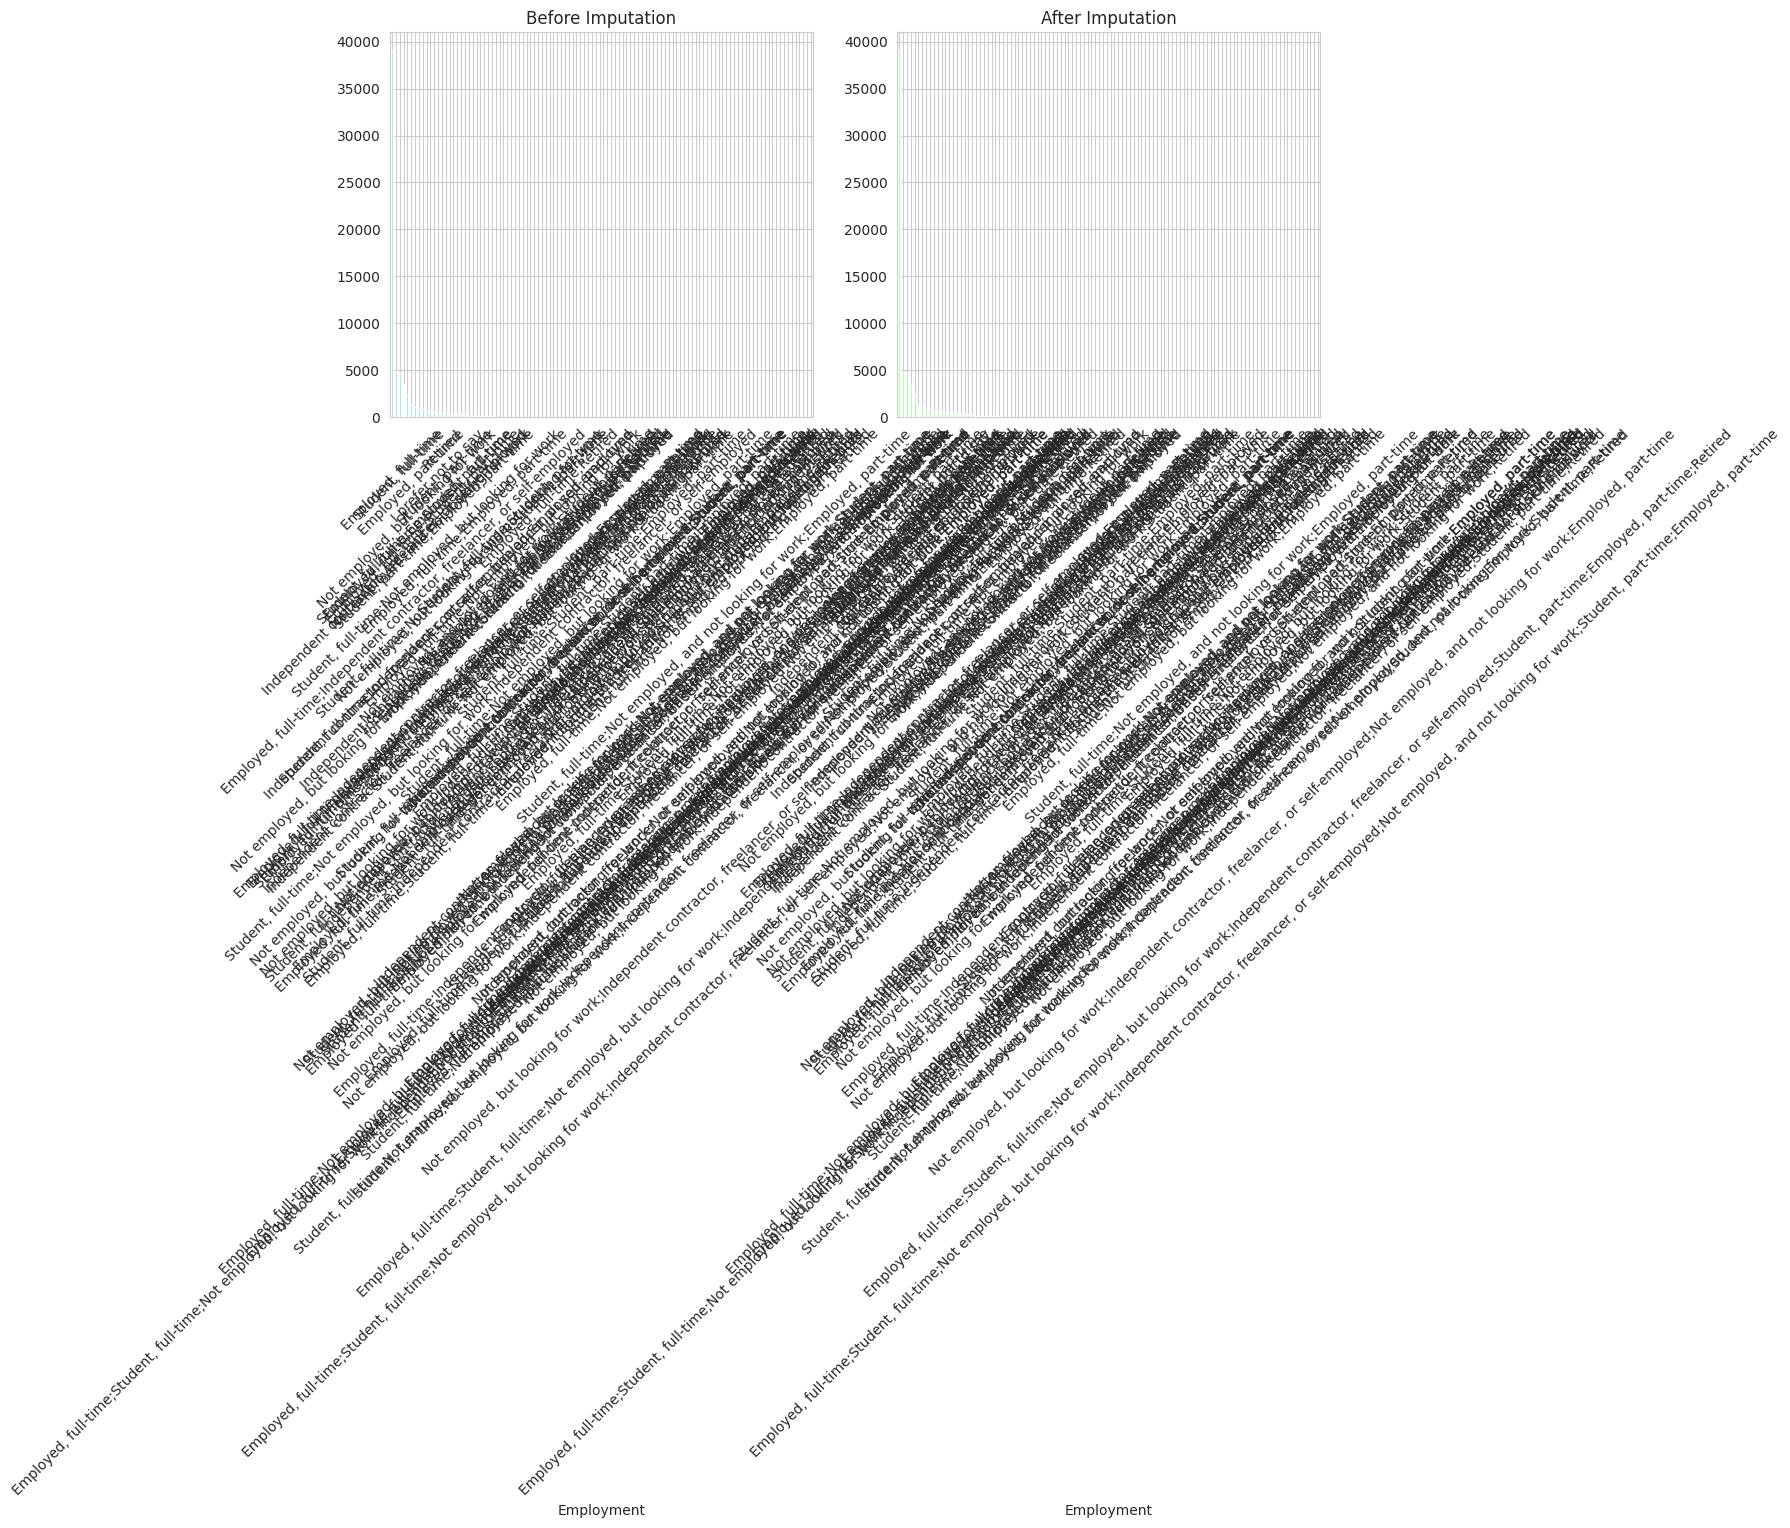

In [12]:
# Step 1: Check for missing values in 'Employment' column
missing_before = df['Employment'].isna().sum()
print(f"Missing values in 'Employment' before imputation: {missing_before}")

# Step 2: Find the most frequent value (mode)
most_frequent = df['Employment'].mode()[0]
print(f"\nMost frequent value in 'Employment': '{most_frequent}'")

# Step 3: Impute missing values with the mode
df['Employment'].fillna(most_frequent, inplace=True)

# Step 4: Verify imputation
missing_after = df['Employment'].isna().sum()
print(f"\nMissing values after imputation: {missing_after}")

# Step 5: Show updated value distribution
print("\nUpdated value counts:")
print(df['Employment'].value_counts())

# Optional: Visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Before imputation
plt.subplot(1, 2, 1)
df['Employment'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.title('Before Imputation')
plt.xticks(rotation=45)

# After imputation
plt.subplot(1, 2, 2)
df['Employment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('After Imputation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 5. Visualizing Imputed Data¶
# Task 7: Visualize the distribution of a column after imputation (e.g., Employment).

<ipython-input-14-b73af2c43704>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_counts.index, y=before_counts.values, palette="Blues_d")
<ipython-input-14-b73af2c43704>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_counts.index, y=after_counts.values, palette="Greens_d")
<ipython-input-14-b73af2c43704>:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


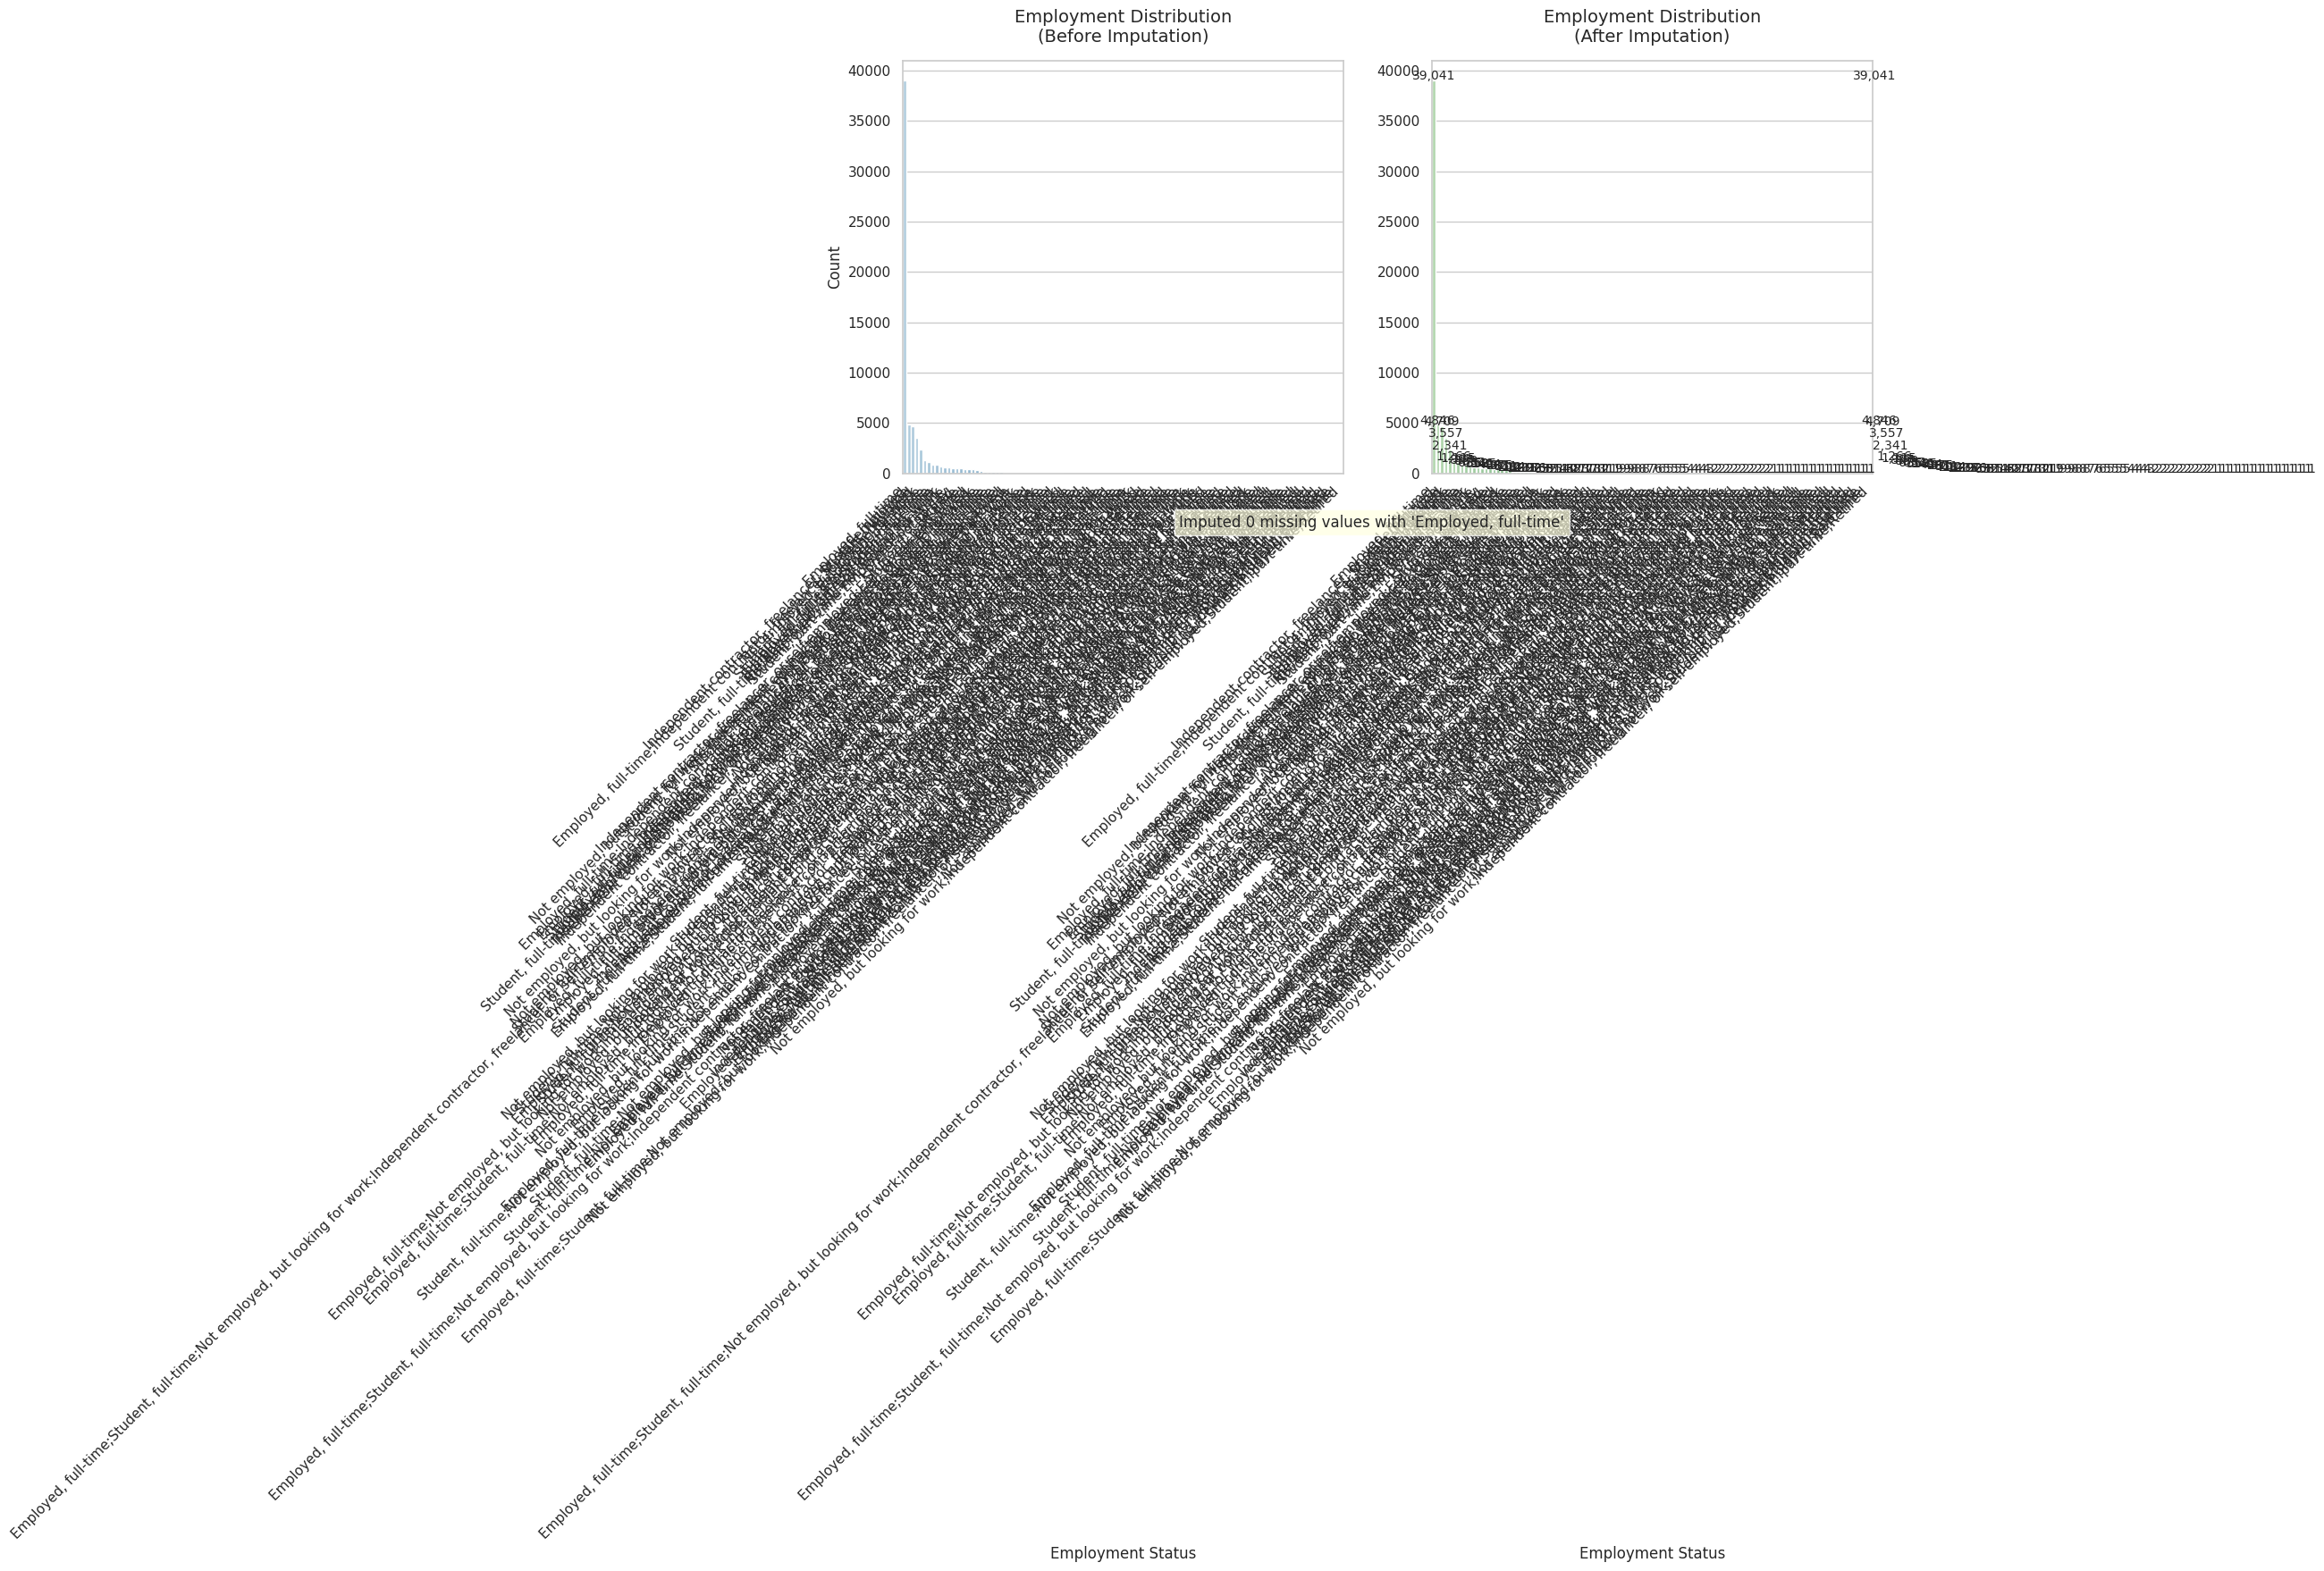

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set modern style
sns.set_theme(style="whitegrid")  # Updated styling method
plt.figure(figsize=(14, 6))

# Before imputation
plt.subplot(1, 2, 1)
before_counts = df['Employment'].value_counts(dropna=False)
if before_counts.isna().any():
    before_counts.index = before_counts.index.fillna('Missing')
sns.barplot(x=before_counts.index, y=before_counts.values, palette="Blues_d")
plt.title('Employment Distribution\n(Before Imputation)', fontsize=14, pad=15)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# After imputation
plt.subplot(1, 2, 2)
after_counts = df['Employment'].value_counts()
sns.barplot(x=after_counts.index, y=after_counts.values, palette="Greens_d")
plt.title('Employment Distribution\n(After Imputation)', fontsize=14, pad=15)
plt.xlabel('Employment Status', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, count in enumerate(before_counts.values):
    plt.text(i, count+50, f"{count:,}", ha='center', fontsize=10)
for i, count in enumerate(after_counts.values):
    plt.text(i+len(before_counts), count+50, f"{count:,}", ha='center', fontsize=10)

# Add summary annotation
plt.figtext(0.5, 0.01,
            f"Imputed {missing_before:,} missing values with '{most_frequent}'",
            ha='center',
            fontsize=12,
            bbox=dict(facecolor='lightyellow', alpha=0.7))

plt.tight_layout(pad=3.0)
plt.show()